In [74]:
import pandas as pd
df1= pd.read_csv(r'C:\Users\Asus\Contacts\Desktop\Machine Learning\bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [75]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)

In [76]:
df1.shape

(13320, 9)

In [77]:
#let's first examine the are type feature
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [78]:
df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [79]:
#let's drop some columns whcih are not of much use
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [80]:
#NOW LET'S START THE DATA CLEANING
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [81]:
#since our datasets has 13k rows and na values are small so we can easily drop the na rows\
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [82]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [83]:
#here we have bedroom and bhk so to get rid of this problem
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Asus\AppData\Local\Temp\ipykernel_1756\948428983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [84]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [85]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [86]:
#so here we have home with 43 rooms
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [87]:
#so a 43 bedroom can't be in 2400 sqft so it looks like an error

In [88]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [89]:
#we here have a range '1133 - 1384' so we will take avergae of it
#so we have to do this data cleaning

In [90]:
#now to check whatever data in total sqft is in float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [91]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #whatever is not in float will return

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [92]:
#now we will convert this range into single float by taking avg of the range
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x) #If there’s only one token (i.e., no hyphen), it attempts to convert the entire string to a float and returns that value
    except:
        return None
    

In [93]:
df4= df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [94]:
df4.loc[30] #use .loc[] to select rows and columns based on labels

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [95]:
#so till now we have cleared na, cleaned total_sqft column and removed unnecessary data

In [96]:
#now we are creating price per sqft which will help in future removal of outlier
df5=df4.copy()
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [97]:
len(df5.location.unique())

1304

In [98]:
#which is a huge no so we can't do dummy for this much unique values
#this is called DIMENSIONALITY CURSE or dimensionality 
df5.location= df5.location.apply(lambda x: x.strip())
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

#groupby will basically make groups of each type in loaction feature
#agg() to aggregate data using various operations such as sum, mean, min, max, and more.
#aggregation can be performed along either the index (rows) or the column axis.

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [99]:
#so to decrease the unique values
#any data point with less than 10 values can be called as 'other location'

In [100]:
len(location_stats[location_stats<10])

1039

In [101]:
loc_stats_less_than_10= location_stats[location_stats<10]
loc_stats_less_than_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [102]:
df5.location= df5.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [103]:
df5[df5.location=='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
49,other,2 BHK,869.0,2.0,36.00,2,4142.692750
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [104]:
len(df5.location.unique())

255

In [105]:
 # now we can use one hot encoding easily in future


In [106]:
#OUTLIER
#represent extreme variation in dataset they might be valid but removing them is imp

In [107]:
#let's take typical size of a room is generally 300 sqft
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [108]:
#so we will remove these rows
df6= df5[~((df5.total_sqft/df5.bhk)<300)]
df6.shape

(12502, 7)

In [109]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [110]:
#so here we can remove extreme min and max cases using standard dev and mean
#Standard deviation is a statistical measure that tells us how much the values in a dataset tend to deviate from the mean
#Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
#We should remove outliers per location using mean and one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):#key is the location name, and subdf is the DataFrame containing data specific to that location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #we want df in range m-st and m+st anything below or above this range is extreme deviation from mean
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10222, 7)

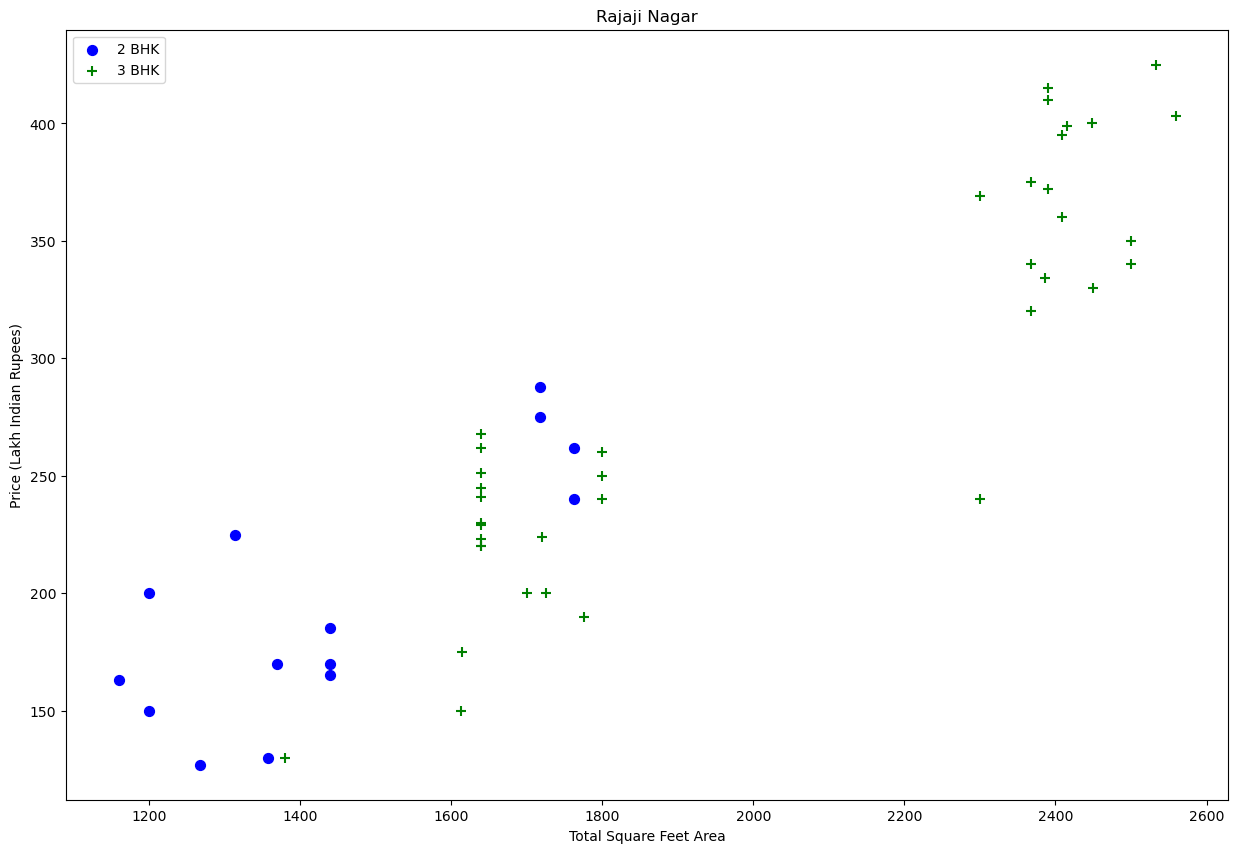

In [111]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [112]:
# #so here around 1700 sqft we can see that some 2bhk at the same  sqft size have higher prices than 3bhk at the same size
# #so we need to remove such cases
# What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#     '1' : {
#         'mean': 4000,
#         'std: 2000,
#         'count': 34
#     },
#     '2' : {
#         'mean': 4300,
#         'std: 2300,
#         'count': 22
#     },    
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
#as 2bhk price persqft can't be less than that of 1bhk price per sqft

In [113]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
#The outer loop iterates over each unique BHK configuration (number of bedrooms, hall, and kitchen) within the current location group (location_df)
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1) #It identifies outliers by comparing the ‘price_per_sqft’ values of the current BHK with the mean of the previous BHK.
            if stats and stats['count']>5: #Whether statistics for the previous BHK configuration exist (stats is not None).
            # Whether there are enough data points of that bhk (count > 5) for meaningful statistics.
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
            #The line bhk_df[bhk_df.price_per_sqft<(stats['mean'])] filters rows where the ‘price_per_sqft’ is less than the mean of the previous BHK configuration
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7369, 7)

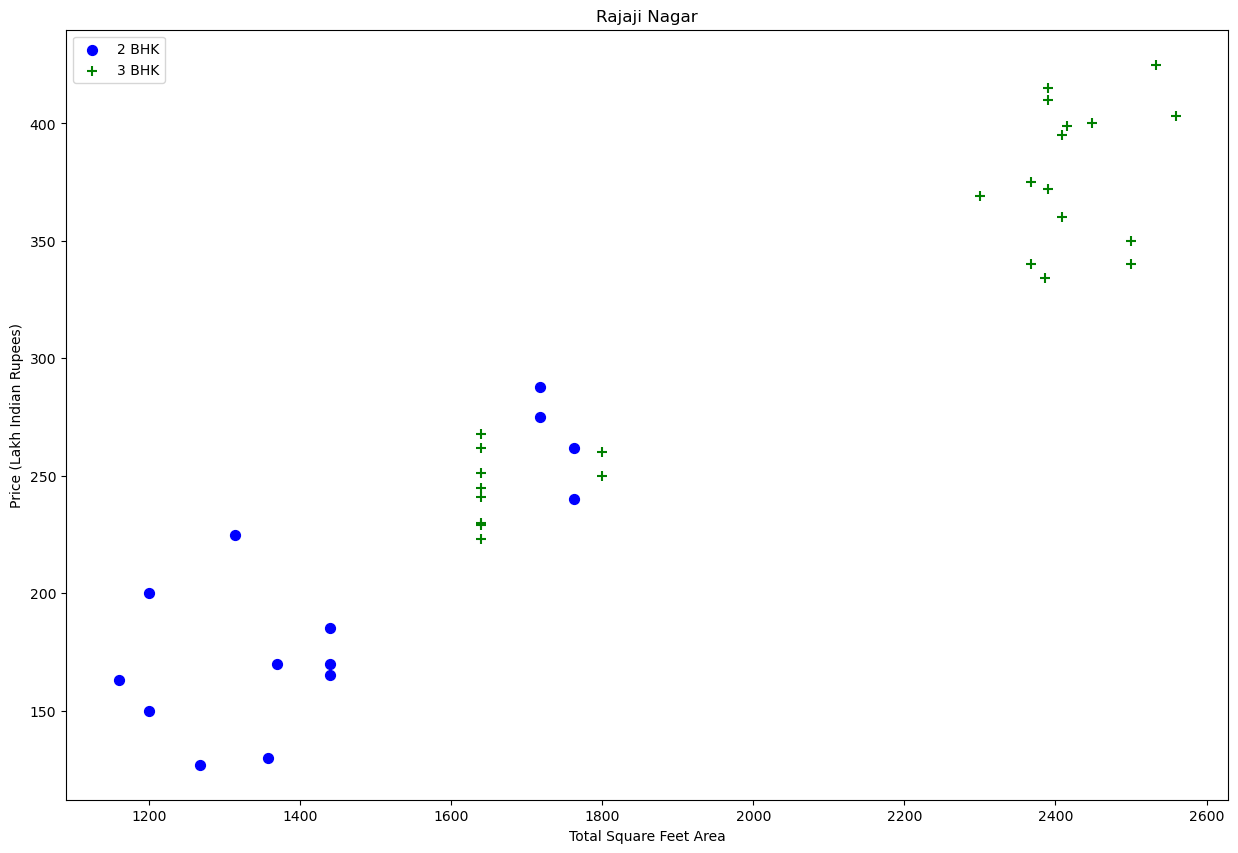

In [114]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [115]:
#so we can compare this graph with the graph that we made above and we can see the difference

Text(0, 0.5, 'Count')

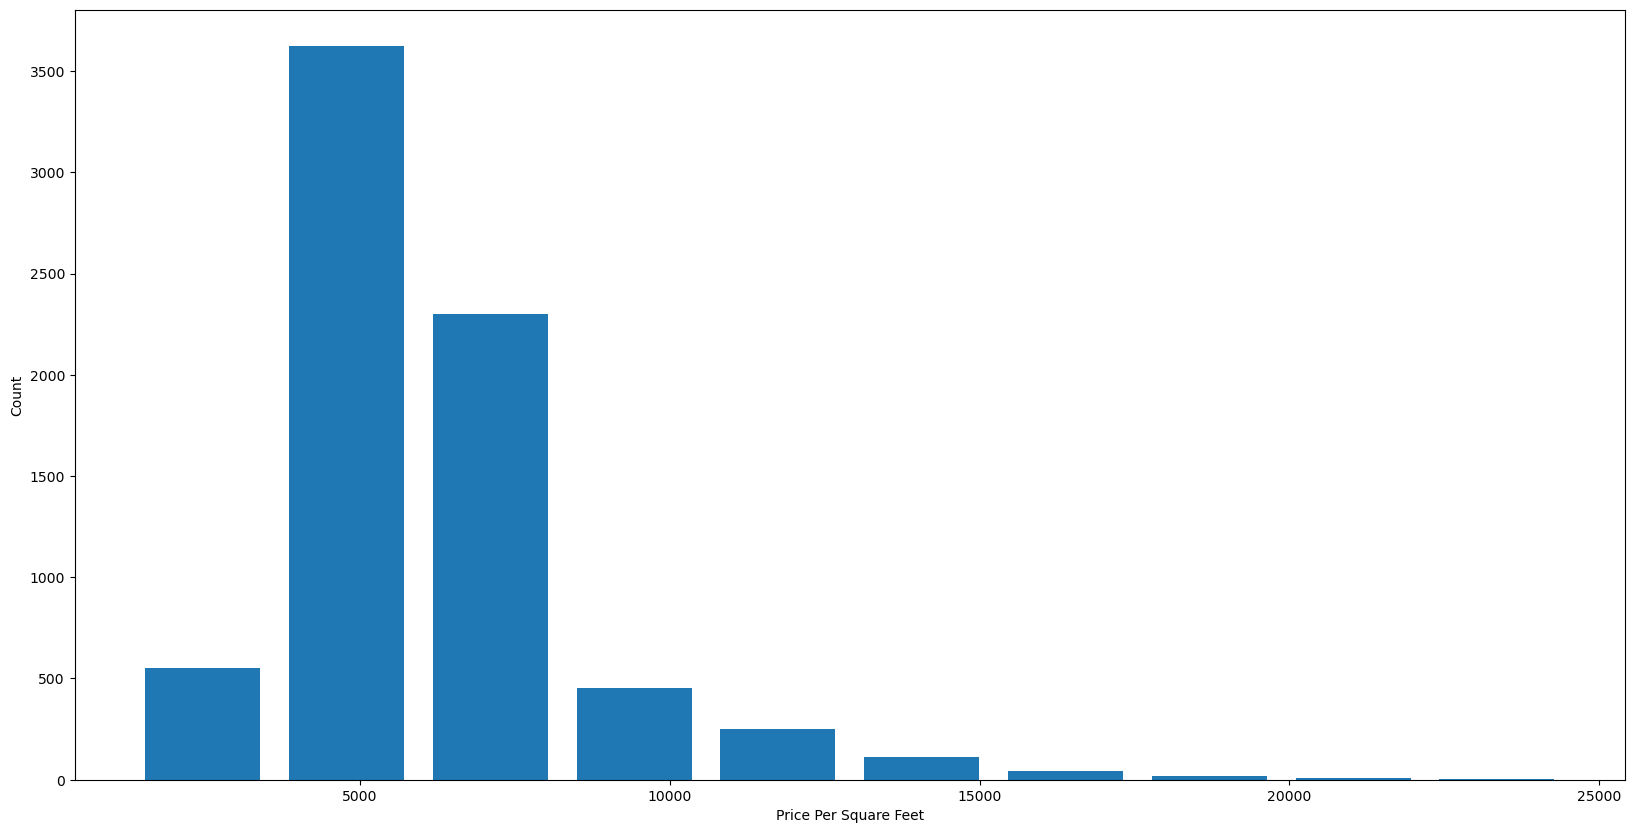

In [116]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [117]:
#so this looks like normal distribution like the bell curve so it's good

In [118]:
#now let's look at our bathroom feature
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [119]:
df9= df8[df8.bath<df8.bhk+2]
df9.shape

(7291, 7)

In [120]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [121]:
#NOW WE WILL WORK ON ML PART
#first convert text using one hot encoding
dummies= pd.get_dummies(df10.location)


In [122]:
df11= pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df12= df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
df12.shape

(7291, 258)

In [125]:
#build a model now


In [126]:
X= df12.drop('price',axis='columns')
y= df12.price

In [127]:
len(X)

7291

In [128]:
len(y)

7291

In [129]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [130]:
#let's try linear regression
from sklearn.linear_model import LinearRegression
lin_mod= LinearRegression()
lin_mod.fit(X_train,y_train)

LinearRegression()

In [131]:
lin_mod.score(X_test,y_test)

0.8556662450160402

In [132]:
#NOW LET'S TRY CROSS VALIDATION
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
k_fold= cross_val_score( LinearRegression(), X, y,cv=cv)
k_fold.mean()

0.8534451320645081

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [134]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
               
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
         
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 600, 

,model,best_score,best_params
0,linear_regression,0.853445,{}
1,lasso,0.703391,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.712403,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [135]:
#NOW FOR TESTING THE MODEL
#so it shows linear regression is best
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] #this is to find the index no of our location

    x = np.zeros(len(X.columns)) #An array x of zeros is created with a length equal to the number of features in the dataset (len(X.columns))
    x[0] = sqft #The values of sqft, bath, and bhk are assigned to specific positions in the x array (indices 0, 1, and 2, respectively)
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0: #If loc_index is non-negative (i.e., the location exists in the dataset), the corresponding position in x is set to 1
        x[loc_index] = 1 

    return lin_mod.predict([x])[0]  #The expression [x] refers to an array or list containing the values of the features (such as square footage, bathrooms, and bedrooms) for a specific property.
#The [0] at the end of the expression accesses the first element of that array or list.

In [136]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.10543612265113

In [137]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.3987827565449

In [138]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.16322432855782

In [139]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.45657096245156

In [141]:
#Now we will export our model using pickle file
import pickle
with open('bangalore_home_price_model.pickle','wb') as f: #The 'wb' mode ensures that the data is written in binary format.
    pickle.dump(lin_mod,f) #The with block automatically closes the file (f) once the pickling operation is complete.
#The pickle.dump() function in Python is used for serialization—the process of converting a Python object hierarchy into a byte stream

In [142]:
#Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))